<br> 1. Function for Earthquake Indices
<br> 2. Parse Loss.txt into array
<br> 3. Graph the loss
<br> 4. plot_model to save model architecture of a certain model
<br> 3.1 Graphing loss for stacked model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['LANL-Earthquake-Prediction', 'models', 'earthquakemodelloss']


In [2]:
import numpy as np 
import pandas as pd
import os
from tqdm import tqdm

# Fix seeds
from numpy.random import seed
seed(639)
from tensorflow import set_random_seed
set_random_seed(5944)



# Grab Earthquake Indices from data

In [3]:
"""
# Import
%time float_data = pd.read_csv("../input/LANL-Earthquake-Prediction/train.csv", dtype={"acoustic_data": np.float32, "time_to_failure": np.float32}).values

#grab the indices of the earthquakes
earthquakeIdx = []
for i in range(0,float_data.shape[0]):
    if(i == 0):
        ttfPrev = 999
    else:
        ttfPrev = float_data[i-1][1]
    ttf = float_data[i][1]
    if (ttfPrev < ttf): #earthquake happened and new ttf will go back up (e.g. 0.00123 --> 14.123)
        earthquakeIdx.append(i-1)
    #if(i%100000000):
        #print("Currently at idx {}/629145480".format(i))
print(earthquakeIdx)
"""
#[5656573, 50085877, 104677355, 138772452, 187641819, 218652629, 245829584, 307838916, 338276286, 375377847, 419368879, 461811622, 495800224, 528777114, 585568143, 621985672] //earthquakes for the current dataset

'\n# Import\n%time float_data = pd.read_csv("../input/LANL-Earthquake-Prediction/train.csv", dtype={"acoustic_data": np.float32, "time_to_failure": np.float32}).values\n\n#grab the indices of the earthquakes\nearthquakeIdx = []\nfor i in range(0,float_data.shape[0]):\n    if(i == 0):\n        ttfPrev = 999\n    else:\n        ttfPrev = float_data[i-1][1]\n    ttf = float_data[i][1]\n    if (ttfPrev < ttf): #earthquake happened and new ttf will go back up (e.g. 0.00123 --> 14.123)\n        earthquakeIdx.append(i-1)\n    #if(i%100000000):\n        #print("Currently at idx {}/629145480".format(i))\nprint(earthquakeIdx)\n'

# Converting Loss txt to np-array for graphing

In [4]:
#Extract loss data textfile-->arrays (to obtain the text file, copy and paste the validation display starting with the line "Epoch 1/30")
import re

def parseLossData(lossFile):
    lines = lossFile.readlines()
    trainLossArr = []
    valLossArr = []
    horizontal = [] #for storing index of each loss (ex: for 30 epochs [0,1,2,3,...,29])
    i = 0
    for line in lines:
        line = line.strip()
        if ("loss" in line): #if the line contains loss
            s = line
            splitVals = re.split('\W+', line)
            #print(splitvals)
            loss = float(splitVals[3]+"."+splitVals[4])
            valLoss = float(splitVals[6]+"."+splitVals[7])
            trainLossArr.append(loss)
            valLossArr.append(valLoss)
            horizontal.append(i)
            i = i+1
    return trainLossArr, valLossArr, horizontal

In [5]:
#plot the loss (this is for one model only)

import matplotlib.pyplot as plt

def plotLoss(trainLoss, valLoss, horizontal, what = 'loss'):
    x = trainLoss
    val_x = valLoss
    
    plt.plot(horizontal, x, 'bo', label = "Training " + what)
    plt.plot(horizontal, val_x, 'b', label = "Validation " + what)
    plt.title("Training and validation " + what)
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    return None

In [6]:
GRUlossfile = open("../input/earthquakemodelloss/model4.1GRU-loss.txt", "r")
GRUtrainLoss,GRUvalLoss,horizontal = parseLossData(GRUlossfile)

LSTMlossfile = open("../input/earthquakemodelloss/model4.1LSTM-loss.txt", "r")
LSTMtrainLoss, LSTMvalLoss, horizontal = parseLossData(LSTMlossfile)

RNNlossfile = open("../input/earthquakemodelloss/model4.1RNN-loss.txt", "r")
RNNtrainLoss, RNNvalLoss, horizontal = parseLossData(RNNlossfile)

Stacklossfile = open("../input/earthquakemodelloss/model4.1Stacked-loss.txt", "r")
Stacktrainloss, StackvalLoss, horizontal = parseLossData(Stacklossfile)

In [7]:
#print(len(GRUtrainLoss),len(GRUvalLoss),len(LSTMtrainLoss),len(LSTMvalLoss),len(RNNtrainLoss),len(RNNvalLoss),len(Stacktrainloss),len(StackvalLoss))
#plotLoss(GRUtrainLoss,GRUvalLoss,horizontal)

# Plot the graph of loss for multiple models

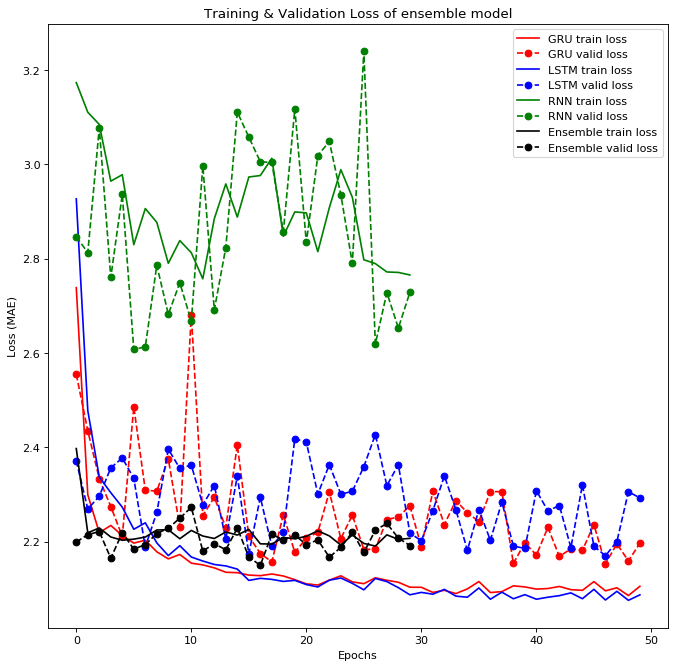

In [8]:
#Merging the graphs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

horizontal1 = range(0, 50)#i for i in range(0,50)#hardcoded since some were 30 epochs, others were 50
horizontal2 = range(0, 30)

plt.plot(horizontal1, GRUtrainLoss, linestyle='-', marker='', color='red', label="GRU train loss")
plt.plot(horizontal1, GRUvalLoss, linestyle='--', marker='o', color='red', label="GRU valid loss")

plt.plot(horizontal1, LSTMtrainLoss, linestyle='-', marker='', color='blue', label="LSTM train loss")
plt.plot(horizontal1, LSTMvalLoss, linestyle='--', marker='o', color='blue', label="LSTM valid loss")

plt.plot(horizontal2, RNNtrainLoss, linestyle='-', marker='', color='green', label="RNN train loss")
plt.plot(horizontal2, RNNvalLoss, linestyle='--', marker='o', color='green', label="RNN valid loss")

plt.plot(horizontal2, Stacktrainloss, linestyle='-', marker='', color='black', label="Ensemble train loss")
plt.plot(horizontal2, StackvalLoss, linestyle='--', marker='o', color='black', label="Ensemble valid loss")

plt.title("Training & Validation Loss of ensemble model")
plt.xlabel("Epochs")
plt.ylabel("Loss (MAE)")
plt.legend()
plt.show()


# Store Model Architecture

In [9]:
"""
#store RNN model

import numpy as np 
import pandas as pd
import os
from tqdm import tqdm

# Fix seeds
from numpy.random import seed
seed(639)
from tensorflow import set_random_seed
set_random_seed(5944)

# Import
%time float_data = pd.read_csv("../input/LANL-Earthquake-Prediction/train.csv", dtype={"acoustic_data": np.float32, "time_to_failure": np.float32}).values
"""

'\n#store RNN model\n\nimport numpy as np \nimport pandas as pd\nimport os\nfrom tqdm import tqdm\n\n# Fix seeds\nfrom numpy.random import seed\nseed(639)\nfrom tensorflow import set_random_seed\nset_random_seed(5944)\n\n# Import\n%time float_data = pd.read_csv("../input/LANL-Earthquake-Prediction/train.csv", dtype={"acoustic_data": np.float32, "time_to_failure": np.float32}).values\n'

In [10]:
"""
def extract_features(z):
     return np.c_[z.mean(axis=1), 
                  z.min(axis=1),
                  z.max(axis=1),
                  z.std(axis=1)]

def create_X(x, last_index=None, n_steps=150, step_length=1000):
    if last_index == None:
        last_index=len(x)
       
    assert last_index - n_steps * step_length >= 0

    # Reshaping and approximate standardization with mean 5 and std 3.
    temp = (x[(last_index - n_steps * step_length):last_index].reshape(n_steps, -1) - 5 ) / 3
    
    # Extracts features of sequences of full length 1000, of the last 100 values and finally also 
    # of the last 10 observations. 
    return np.c_[extract_features(temp),
                 extract_features(temp[:, -step_length // 5:]),
                 extract_features(temp[:, -step_length // 10:]),
                 extract_features(temp[:, -step_length // 20:]),
                 extract_features(temp[:, -step_length // 25:]),
                 extract_features(temp[:, -step_length // 40:]),
                 extract_features(temp[:, -step_length // 50:]),
                 extract_features(temp[:, -step_length // 100:])]

from keras.models import Sequential
from keras.layers import Dense, CuDNNGRU, SimpleRNN, Dropout
from keras.optimizers import adam
from keras.callbacks import ModelCheckpoint
from keras import regularizers

n_features = create_X(float_data[0:150000]).shape[1]
cb = [ModelCheckpoint("model.hdf5", save_best_only=True, period=3)]

model = Sequential()
model.add(SimpleRNN(48, input_shape=(None, n_features), kernel_regularizer =regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.summary()
"""

'\ndef extract_features(z):\n     return np.c_[z.mean(axis=1), \n                  z.min(axis=1),\n                  z.max(axis=1),\n                  z.std(axis=1)]\n\ndef create_X(x, last_index=None, n_steps=150, step_length=1000):\n    if last_index == None:\n        last_index=len(x)\n       \n    assert last_index - n_steps * step_length >= 0\n\n    # Reshaping and approximate standardization with mean 5 and std 3.\n    temp = (x[(last_index - n_steps * step_length):last_index].reshape(n_steps, -1) - 5 ) / 3\n    \n    # Extracts features of sequences of full length 1000, of the last 100 values and finally also \n    # of the last 10 observations. \n    return np.c_[extract_features(temp),\n                 extract_features(temp[:, -step_length // 5:]),\n                 extract_features(temp[:, -step_length // 10:]),\n                 extract_features(temp[:, -step_length // 20:]),\n                 extract_features(temp[:, -step_length // 25:]),\n                 extract_feature

In [11]:
"""
from keras.utils import plot_model
plot_model(model, to_file='rnn_model.png',show_shapes=True)
"""

"\nfrom keras.utils import plot_model\nplot_model(model, to_file='rnn_model.png',show_shapes=True)\n"